In [162]:
import os, shutil
from keras import optimizers

In [163]:
original_dataset='datasets/cats_dogs'
train_dir="datasets/cats_and_dogs_small/train"
test_dir="datasets/cats_and_dogs_small/test"
validation_dir="datasets/cats_and_dogs_small/validation"
train_cat=os.path.join(train_dir,'cats')
train_dog=os.path.join(train_dir,'dogs')
test_cat=os.path.join(test_dir,'cats')
test_dog=os.path.join(test_dir,'dogs')
validation_cat=os.path.join(validation_dir,'cats')
validation_dog=os.path.join(validation_dir,'dogs')



In [164]:
from keras import layers
from keras import models

In [165]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [166]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [58]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [167]:
from keras.preprocessing.image import ImageDataGenerator


In [168]:
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [169]:
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),
                                                  batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.


In [170]:
validation_generator=test_datagen.flow_from_directory(validation_dir,target_size=(150,150),
                                                     batch_size=20,class_mode='binary')

Found 1000 images belonging to 2 classes.


In [79]:
history=model.fit_generator(
            train_generator,steps_per_epoch=100,
            epochs=30,
             validation_data=validation_generator,
             validation_steps=50)


Epoch 1/30
100/100 [==============================] - 141s 1s/step - loss: 0.6924 - acc: 0.5275 - val_loss: 0.7260 - val_acc: 0.5180
Epoch 2/30
100/100 [==============================] - 140s 1s/step - loss: 0.6625 - acc: 0.5955 - val_loss: 0.6803 - val_acc: 0.5670
Epoch 3/30
100/100 [==============================] - 141s 1s/step - loss: 0.6184 - acc: 0.6585 - val_loss: 0.5338 - val_acc: 0.6500
Epoch 4/30
100/100 [==============================] - 144s 1s/step - loss: 0.5775 - acc: 0.7070 - val_loss: 0.6394 - val_acc: 0.6750
Epoch 5/30
100/100 [==============================] - 144s 1s/step - loss: 0.5398 - acc: 0.7345 - val_loss: 0.6571 - val_acc: 0.6920
Epoch 6/30
100/100 [==============================] - 143s 1s/step - loss: 0.5097 - acc: 0.7595 - val_loss: 0.5626 - val_acc: 0.6660
Epoch 7/30
100/100 [==============================] - 151s 2s/step - loss: 0.4782 - acc: 0.7825 - val_loss: 0.4667 - val_acc: 0.7050
Epoch 8/30
100/100 [==============================] - 149s 1s/step -

In [80]:
#save the model
model.save("cats_and_dogs_small_1.h5")

In [ ]:
#reading the saved model
model=keras.models.load_model("cats_and_dogs_small_1.h5")
#model.summary()

In [ ]:
from keras.preprocessing import image
import numpy as np
img_path="datasets/cats_dogs/dog.2780.jpg"
img=image.load_img(img_path,target_size=(150,150))
img_tensor=image.img_to_array(img)
img_tensor=np.expand_dims(img_tensor,axis=0)
img_tensor/=255.
img_tensor.shape

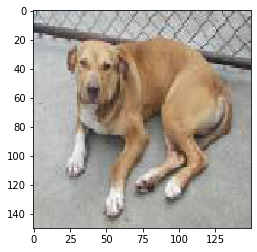

In [107]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [147]:
#study the output of every layer in model
from keras import models
layer_outputs=[layer.output for layer in model.layers[:10]]
activation_model=models.Model(inputs=model.input,outputs=layer_outputs)
activations=activation_model.predict(img_tensor)

In [148]:
for i in range(7):
    print(activations[i].shape)

(1, 148, 148, 32)
(1, 74, 74, 32)
(1, 72, 72, 64)
(1, 36, 36, 64)
(1, 34, 34, 128)
(1, 17, 17, 128)
(1, 15, 15, 128)


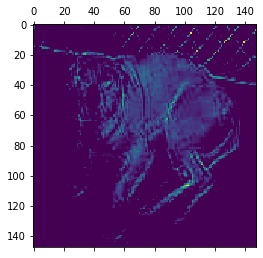

In [149]:
#fourth filter of first layer
first_layer_activation=activations[0]
plt.matshow(first_layer_activation[0,:,:,4],cmap='viridis')

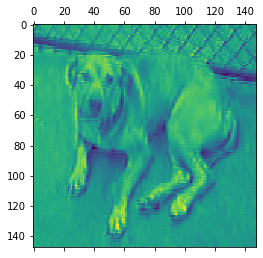

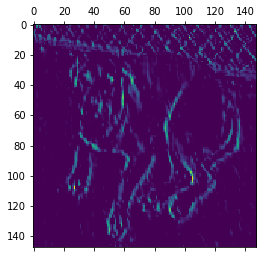

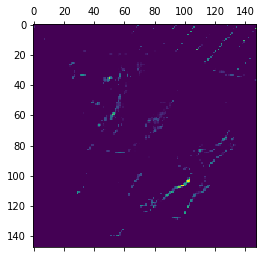

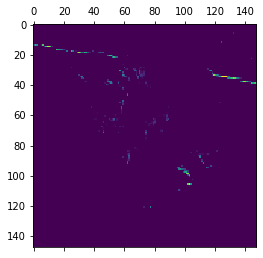

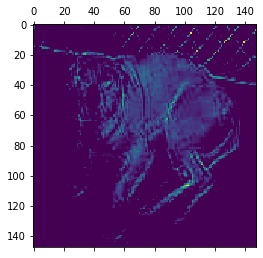

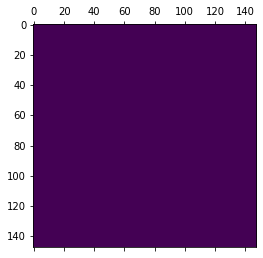

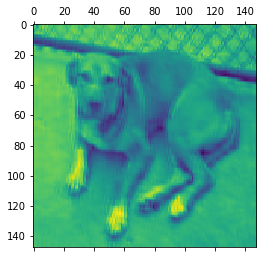

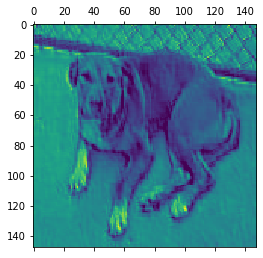

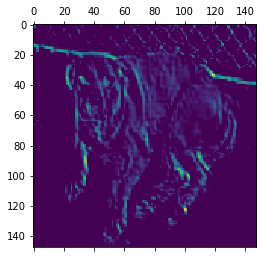

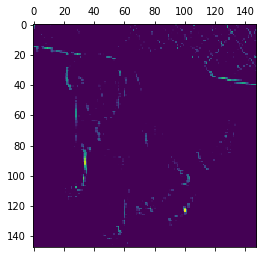

In [151]:
#first 10 filter by first layer
for i in range(10):
    plt.matshow(first_layer_activation[0,:,:,i],cmap='viridis')
   

In [153]:
third_layer_activation=activations[3]
third_layer_activation.shape

(1, 36, 36, 64)

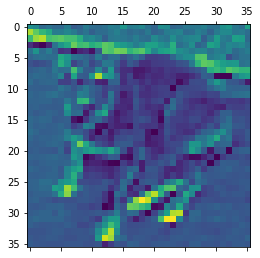

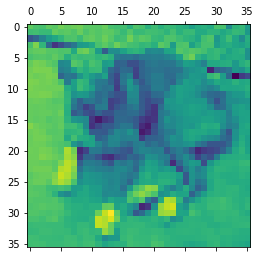

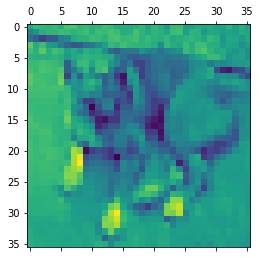

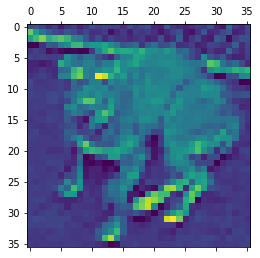

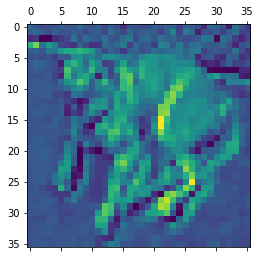

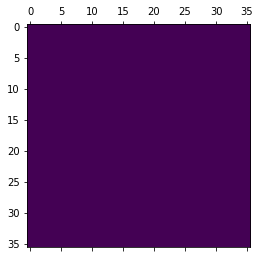

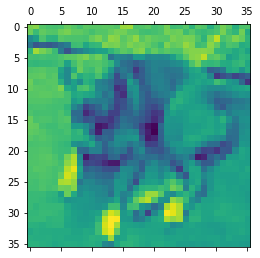

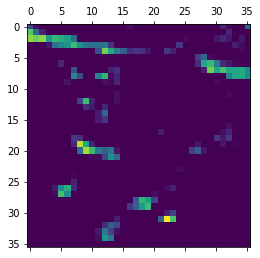

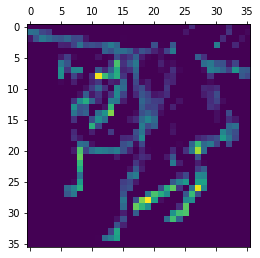

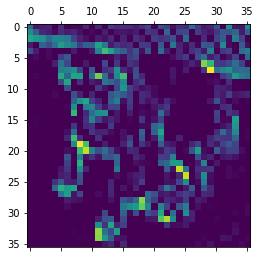

In [156]:
for i in range (10):
    plt.matshow(third_layer_activation[0,:,:,i],cmap='viridis')


In [112]:
#making prediction of image
model.predict(img_tensor)

array([[0.9980252]], dtype=float32)

In [37]:
fnames=['cat.{}.jpg'.format(i) for i in range(1000)]

In [25]:
for fname in fnames:
    src=os.path.join(original_dataset,fname)
    dst=os.path.join(train_cat,fname)
    shutil.copyfile(src,dst)

In [26]:
fnames=['cat.{}.jpg'.format(i) for i in range(1000,1500)]

In [28]:
for fname in fnames:
    src=os.path.join(original_dataset,fname)
    dst=os.path.join(validation_cat,fname)
    shutil.copyfile(src,dst)

In [29]:
fnames=['cat.{}.jpg'.format(i) for i in range(1500,2000)]

In [30]:
for fname in fnames:
    src=os.path.join(original_dataset,fname)
    dst=os.path.join(test_cat,fname)
    shutil.copyfile(src,dst)

In [31]:
fnames=['dog.{}.jpg'.format(i) for i in range(1000)]

In [33]:
for fname in fnames:
    src=os.path.join(original_dataset,fname)
    dst=os.path.join(train_dog,fname)
    shutil.copyfile(src,dst)

In [38]:
fnames=['dog.{}.jpg'.format(i) for i in range(1000,1500)]

In [39]:
for fname in fnames:
    src=os.path.join(original_dataset,fname)
    dst=os.path.join(validation_dog,fname)
    shutil.copyfile(src,dst)

In [40]:
fnames=['dog.{}.jpg'.format(i) for i in range(1500,2000)]

In [41]:
for fname in fnames:
    src=os.path.join(original_dataset,fname)
    dst=os.path.join(test_dog,fname)
    shutil.copyfile(src,dst)